# Analysis of SSW events on the Southern Hemisphere

In [65]:
import xarray as xr
import xarray.ufuncs as xrf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
from matplotlib import colors

import sys

# appending a path
sys.path.append('/home/hochatmstud/bene/code/python-scripts/')

from definitions import *  # imports all functions from definitions.py which is located in the code-folder 'python-scripts'

xr.set_options(
    keep_attrs=True, display_style="html"
)  # Attributes of DataArrays will be kept through operations.
plt.rcParams["font.size"] = "22"


alt = [
    70,
    72,
    74,
    76,
    78,
    80,
    82,
    84,
    86,
    88,
    90,
    92,
    94,
    96,
    98,
    100,
    102,
    104,
    106,
    108,
    110,
    112,
    114,
    116,
    118,
    120,
]
root_path = "/home/gemeinsam_tmp/UA_students/data/PW_GW_analysis/"
#dir_path = "/home/hochatmstud/bene/"

In [66]:
station = "Esrange"

## Wind measurements

In [67]:
ds_wind = read_group("wind", station, root_path)

u = read_var(ds_wind, "u0")
v = read_var(ds_wind, "v0")

u_anomalie = anomalie("dayofyear", u)

v_anomalie = anomalie("dayofyear", v)


/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [68]:
analysis_start = "2019-08-18"
analysis_end = "2019-10-18"

upper_boundary = 101
lower_boundary = 77

### Zonal wind component

#### Climatology

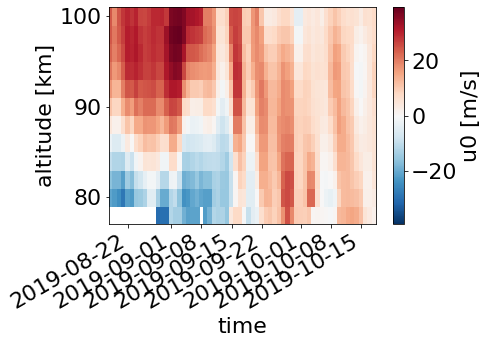

In [69]:
u.sel(time=slice(analysis_start, analysis_end),alt=slice(lower_boundary,upper_boundary)).plot(x='time')

#### Anomalies

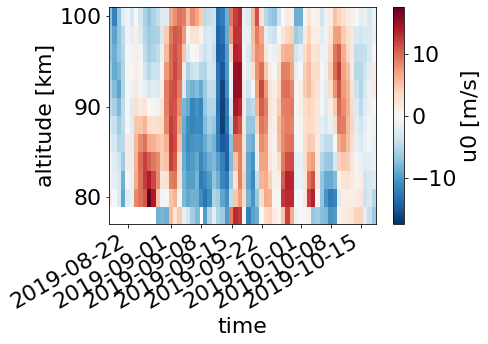

In [70]:
u_anomalie.sel(time=slice(analysis_start, analysis_end),alt=slice(lower_boundary,upper_boundary)).plot(x='time')

### Meridional wind component

#### Climatology

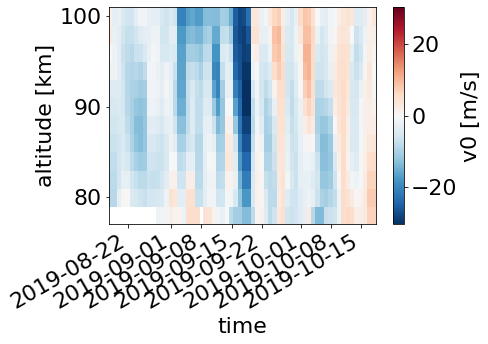

In [71]:
v.sel(time=slice(analysis_start, analysis_end),alt=slice(lower_boundary,upper_boundary)).plot(x='time')

#### Anomalies

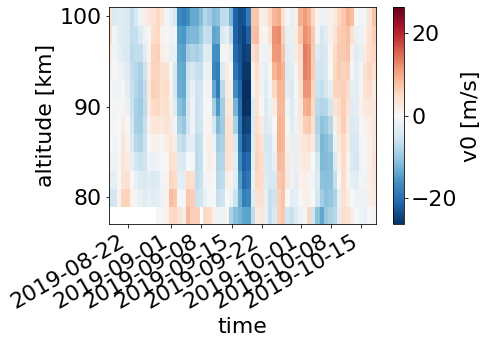

In [72]:
v_anomalie.sel(time=slice(analysis_start, analysis_end),alt=slice(lower_boundary,upper_boundary)).plot(x='time')

## Wave estimates

In [73]:
ds_waves = read_group("waves", station, root_path)
gw = read_var(ds_waves, "GW")
pw = read_var(ds_waves, "PW")

if station == "Sodankyla_Kiruna":
    gw = gw.sel(time=slice("2008", "2020"))
    pw = pw.sel(time=slice("2008", "2020"))

gw_anomalie = anomalie("dayofyear", gw)

pw_anomalie = anomalie("dayofyear", pw)

/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


### Gravity waves

#### Gravity wave activity

##### Climatology

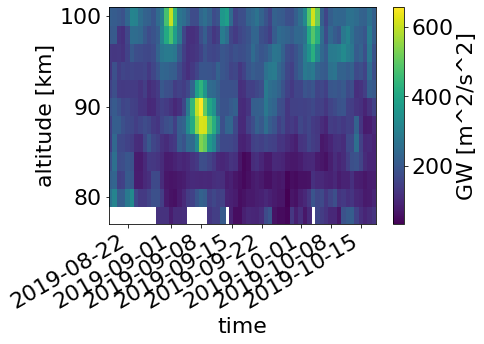

In [74]:
gw.sel(time=slice(analysis_start, analysis_end),alt=slice(lower_boundary,upper_boundary)).plot(x='time')

##### Anomalies

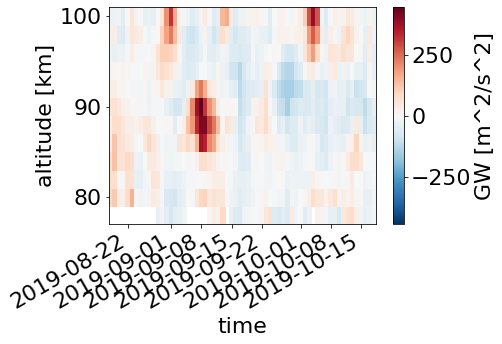

In [75]:
gw_anomalie.sel(time=slice(analysis_start, analysis_end),alt=slice(lower_boundary,upper_boundary)).plot(x='time')

#### Gravity wave drag

In [76]:
station_name = station

directory = glob.glob(f"{root_path}GWD*_{station}.nc")[0]

ds = xr.open_dataset(directory)

gwd = ds["GWD"]

if station == "Sodankyla_Kiruna":
    gwd = gwd.sel(time=slice("2008", "2021"))

gwd_anomalie = anomalie("dayofyear", gwd)

/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


##### Climatology

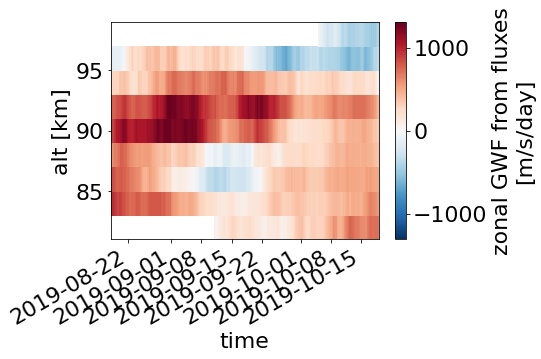

In [77]:
gwd.sel(time=slice(analysis_start, analysis_end),alt=slice(82,98)).plot(x='time')

##### Anomalies

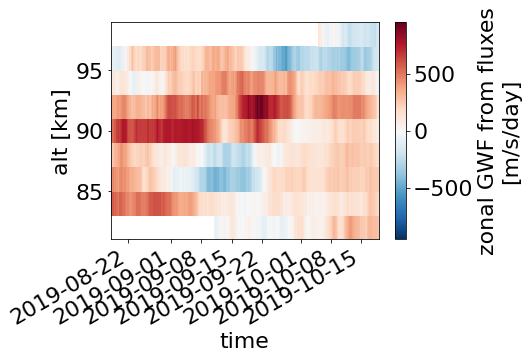

In [78]:
gwd_anomalie.sel(time=slice(analysis_start, analysis_end),alt=slice(82,98)).plot(x='time')

### Planetary waves

#### Climatology

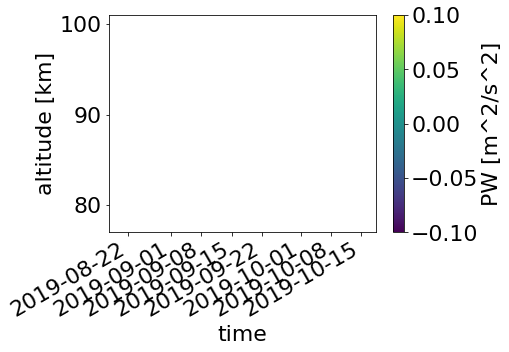

In [79]:
pw.sel(time=slice(analysis_start, analysis_end),alt=slice(lower_boundary,upper_boundary)).plot(x='time')

#### Anomalies

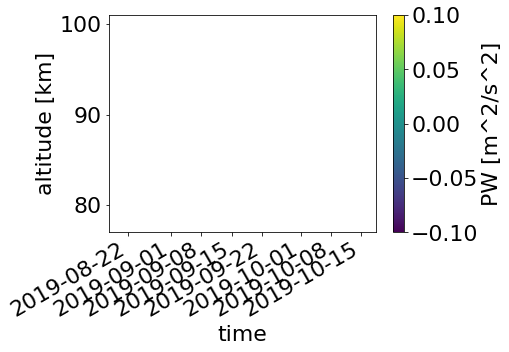

In [80]:
pw_anomalie.sel(time=slice(analysis_start, analysis_end),alt=slice(lower_boundary,upper_boundary)).plot(x='time')

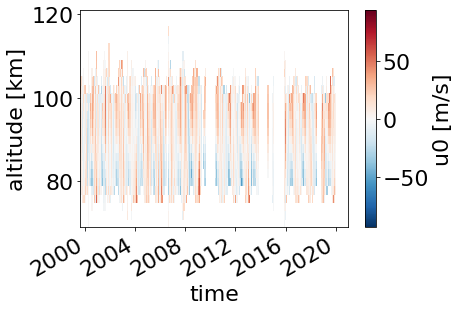

In [81]:
u.plot(x='time')

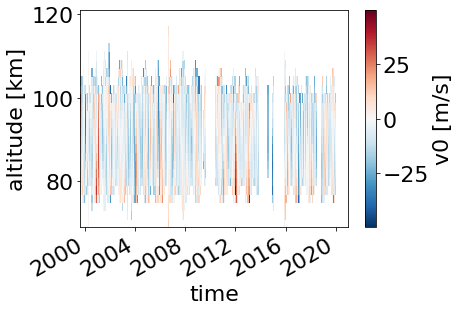

In [82]:
v.plot(x='time')

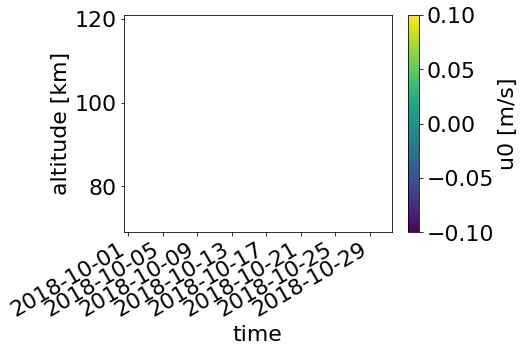

In [83]:
u.sel(time=slice("2018-10", "2018-10-31")).plot(x='time')

In [84]:
u

<xarray.DataArray 'u0' (time: 7824, alt: 26)>
[203424 values with dtype=float64]
Coordinates:
  * alt      (alt) float64 70.0 72.0 74.0 76.0 78.0 ... 114.0 116.0 118.0 120.0
  * time     (time) datetime64[ns] 1999-08-01 1999-08-02 ... 2020-12-31
Attributes:
    zonal wind:  zonal / m/s
    units:       m/s

In [85]:
directory = "/home/gemeinsam_tmp/UA_students/data/Col/Meteor_radar_Col_GW_201909.h5"

ds = xr.open_dataset(directory)

wind = ds["wind"]

if station == "Sodankyla_Kiruna":
    wind = wind.sel(time=slice("2008", "2021"))

wind_anomalie = anomalie("dayofyear", wind)

KeyError: 'wind'

In [ ]:
ds

In [ ]:
infiles = f"/home/gemeinsam_tmp/UA_students/data/CMA/Meteor_radar_CMA_GW_*.h5"
ds = xr.open_mfdataset(
    infiles,
    concat_dim="phony_dim_6",
    group='wind',
    combine="nested",
    parallel=True,
)
ds = ds.rename({"phony_dim_6": "time", "phony_dim_7": "alt"})
    
ds["alt"] = alt
ds["alt"].attrs["units"] = "km"
# change time range according to meteor radar station
    

In [ ]:
infiles

In [ ]:
ds

In [ ]:
u=ds['u0']

In [ ]:
u.plot(x='time')

In [ ]:
v=ds['v0']

In [ ]:
v.plot(x='time')

In [ ]:
v

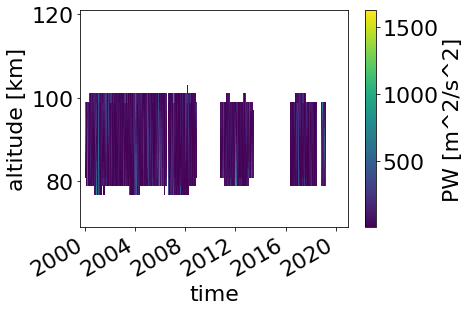

In [86]:
pw.plot(x='time')